# Importing Packages

In [1]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import mplsoccer
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mplsoccer.scatterutils import scatter_football
from matplotlib.patches import Polygon
from mplsoccer.scatterutils import football_hexagon_marker

# Loading Data

In [2]:
# matchIds = list(sb.matches(competition_id=11,season_id=41)['match_id'].unique())

# events_df = pd.DataFrame()
# for matchId in matchIds:
#     match_df = sb.events(matchId)
#     events_df = events_df.append(match_df,ignore_index=True)

# events_df.to_csv('D:\Analytics\Football\Trials\Data\Statsbomb\Messi 08-09.csv',index=False)

In [3]:
events_df = pd.read_csv('D:\Analytics\Football\Barcalytix\Data\Statsbomb\Messi 08-09.csv',low_memory=False)

# Data Prep

In [4]:
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

In [5]:
plt.rcParams['font.sans-serif'] = "Arial Rounded MT Bold"
plt.rcParams['font.family'] = "sans-serif"

In [6]:
events_df.columns.values

array(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type',
       'id', 'index', 'injury_stoppage_in_chain', 'interception_outcome',
       'location', 'match_id', 'minute', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back',
       'pass_end_location', 'p

In [7]:
df = events_df[events_df['player']=='Xavier Hernández Creus']

In [8]:
# events_df['xA'] = events_df['shot_statsbomb_xg'].shift(-1)

In [9]:
df['pass_outcome'].fillna('Complete',inplace=True)

C:\Users\chait\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
df = df[((df['type']=='Pass')&(df['pass_outcome']=='Complete'))|(df['type']=='Carry')]
df.reset_index(inplace=True,drop=True)

In [11]:
df['x'] = df['location'].str.split(', ',expand=True)[0].str[1:].apply(pd.to_numeric)
df['y'] = df['location'].str.split(', ',expand=True)[1].str[:-1].apply(pd.to_numeric)

df['endX'] = df['pass_end_location'].str.split(', ',expand=True)[0].str[1:].apply(pd.to_numeric)
df['endY'] = df['pass_end_location'].str.split(', ',expand=True)[1].str[:-1].apply(pd.to_numeric)

df['CarryEndX'] = df['carry_end_location'].str.split(', ',expand=True)[0].str[1:].apply(pd.to_numeric)
df['CarryEndY'] = df['carry_end_location'].str.split(', ',expand=True)[1].str[:-1].apply(pd.to_numeric)

df['endX'].fillna(df['CarryEndX'],inplace=True)
df['endY'].fillna(df['CarryEndY'],inplace=True)

In [12]:
df['initDistanceFromGoal'] = np.sqrt(np.square(120-df['x']) + np.square(40-df['y']))
df['finalDistanceFromGoal'] = np.sqrt(np.square(120-df['endX']) + np.square(40-df['endY']))

In [13]:
df['Progressive']=[(df['finalDistanceFromGoal'][x])/(df['initDistanceFromGoal'][x])<0.75 for x in range(len(df))]

In [14]:
assists = df[df['pass_goal_assist']==True]
keyPasses = df[df['pass_shot_assist']==True]
progPasses = df[(df['type']=='Pass')&(df['Progressive']==True)]
progCarries = df[(df['type']=='Carry')&(df['Progressive']==True)]

In [15]:
goals = events_df[events_df['shot_outcome']=='Goal']
y = goals[['shot_key_pass_id','shot_statsbomb_xg']].drop_duplicates()

goal_key_pass_id = list(y['shot_key_pass_id'])
goal_xg = list(y['shot_statsbomb_xg'])

assistDict = dict(zip(goal_key_pass_id,goal_xg))

assists['xA'] = assists['id']
assists['xA'].replace(assistDict,inplace=True)

<ipython-input-15-7fed57dcd50b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assists['xA'] = assists['id']
C:\Users\chait\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [16]:
x = events_df[['shot_key_pass_id','shot_statsbomb_xg']].drop_duplicates()

shot_key_pass_id = list(x['shot_key_pass_id'])
shot_xg = list(x['shot_statsbomb_xg'])

keyPassDict = dict(zip(shot_key_pass_id,shot_xg))

keyPasses['xA'] = keyPasses['id']
keyPasses['xA'].replace(keyPassDict,inplace=True)

<ipython-input-16-49ec7aedf258>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyPasses['xA'] = keyPasses['id']


# Visualization

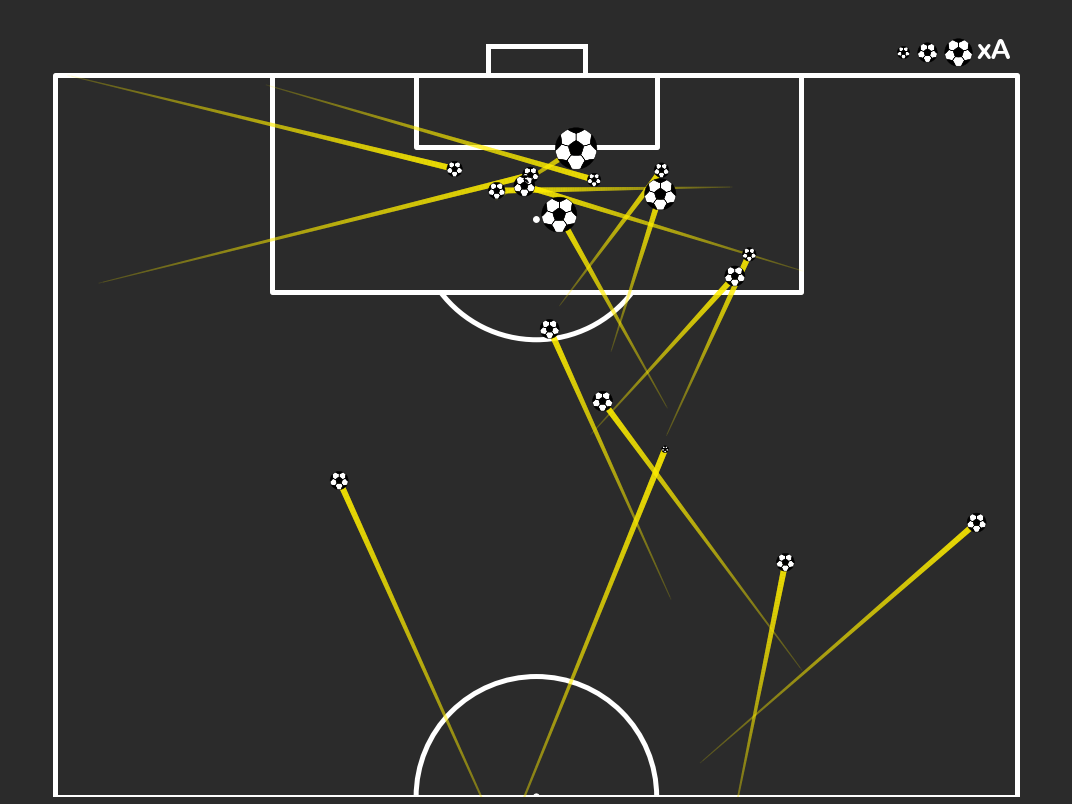

In [21]:
pitch = mplsoccer.VerticalPitch(pitch_type='statsbomb',pitch_color='#2b2b2b',line_color='w',linewidth=5, half=True, pad_bottom=0, goal_type='box')
fig, ax = pitch.draw(figsize=(15,15)) 
fig.set_facecolor('#2b2b2b')
# ax.add_patch(Polygon([[0,0],[100,0],[100,49.75],[0,49.75]],lw=5,closed=True,color='#2b2b2b',zorder=7))

ax2 = fig.add_axes([0.725,0.805,0.22,0.07])
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.set_facecolor('None')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_xlim(0,100)
ax2.set_ylim(0,100)

scatter_football(2+50,41,edgecolors='black',s=80*2, c='white',ax=ax2)
scatter_football(12+50,41,edgecolors='black',s=200*2, c='white',ax=ax2)
scatter_football(25+50,41,edgecolors='black',s=400*2, c='white',ax=ax2)
ax2.text(33+50,32,'xA',color='white',fontsize=28,fontweight='bold')


pitch.lines(assists['x'],assists['y'],
            assists['endX'],assists['endY'],comet=True,
            color='#ffee00',lw=6,alpha_end=0.7,alpha_start=0.1,transparent=True,
            zorder = 2, 
            ax=ax)
pitch.scatter(assists['endX'],assists['endY'],edgecolor='black',c='white',marker='football',
              alpha=1,s=assists['xA']*2000,zorder=3,ax=ax)

# ax.patch.set_facecolor('None')
# ax2.patch.set_facecolor('None')
# fig.set_alpha = 0.0
# fig.patch.set_visible(False)

# fig.savefig(r'D:\Analytics\Football\Trials\Figures\XaviAssists-1.png',dpi=300,bbox_inches='tight')

plt.show()